> This is a rework of my task during Computer Vision class in 2022.

> Goal(s):
- to create panoramic image using image stitching technique.

> Reference(s):
1.  https://pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/

# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Image Preparation

In [2]:
def show_img(img, title, cmap=None):
  plt.imshow(img, cmap=cmap)
  plt.title(title)
  plt.axis('off')

In [3]:
path = 'dataset/image-stitching/'

In [4]:
def compile_img(path):
  images = []
  titles = []
  for file_name in os.listdir(path):
    img = cv2.cvtColor(cv2.imread(path + file_name), cv2.COLOR_BGR2RGB)
    images.append(img)
    titles.append(file_name)
  return images, titles

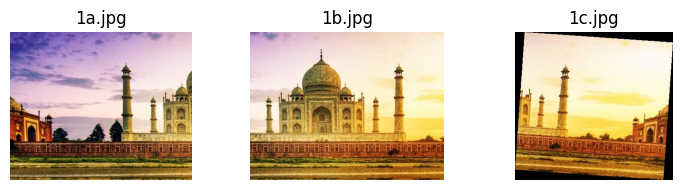

In [5]:
images, titles = compile_img(path)
num_rows = int(np.ceil(len(images) / 4))
plt.figure(figsize=(10, 2 * num_rows))
for idx, img in enumerate(images):
  plt.subplot(num_rows, 4, idx + 1)
  show_img(img, titles[idx])
plt.tight_layout()

# CV2 Stitcher 

In [6]:
stitcher = cv2.Stitcher_create()

> This `stitcher` will return 2 values, an error message and the stitched image.
If the error value is equal to true, it means that there are not enough connected keypoints to stitch the image.

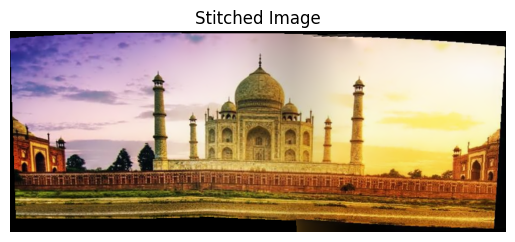

In [7]:
error, stitched_img = stitcher.stitch(images)
if (error == 0):
  show_img(stitched_img, 'Stitched Image')

# Remove The Black Pixels

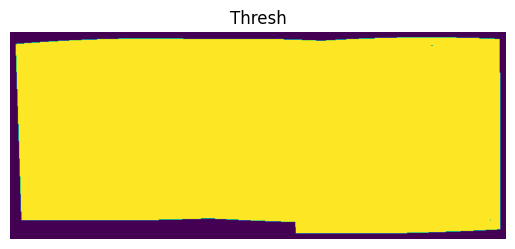

In [8]:
stitched_img = cv2.copyMakeBorder(stitched_img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0,0,0))
gray = cv2.cvtColor(stitched_img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
show_img(thresh, 'Thresh')

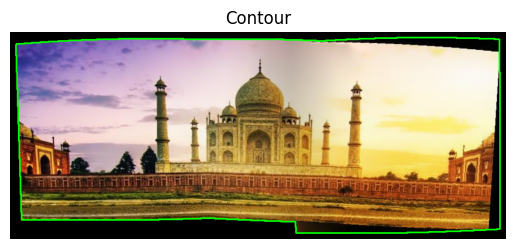

In [9]:
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = stitched_img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
show_img(contour_img, 'Contour')

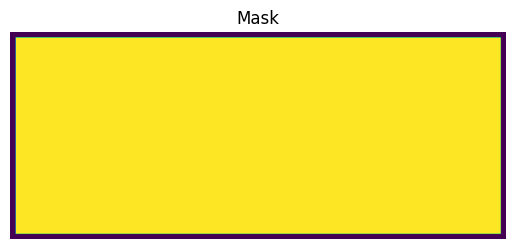

In [10]:
area = max(contours, key=cv2.contourArea)
mask = np.zeros(thresh.shape, dtype='uint8')
x, y, w, h = cv2.boundingRect(area)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
show_img(mask, 'Mask')

In [11]:
minRectangle = mask.copy()
sub = mask.copy()
while cv2.countNonZero(sub) > 0:
  minRectangle = cv2.erode(minRectangle, None)
  sub = cv2.subtract(minRectangle, thresh)

In [12]:
contours, _ = cv2.findContours(minRectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Result

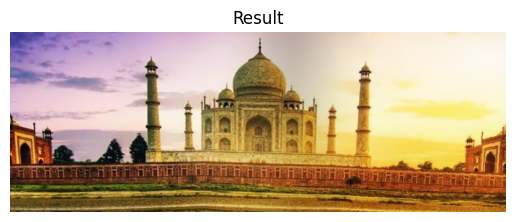

In [13]:
area = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(area)
stitched_img = stitched_img[y:y+h, x:x+w]
show_img(stitched_img, 'Result')